## Imports

In [1]:
# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.style.use('seaborn-whitegrid')
import seaborn as sns

import numpy

import statsmodels.api as sm
import scipy.stats as scs

import sklearn
#classe pour l'ACP
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import scale


#RegLog Kmeans
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

#CAH
from scipy.cluster.hierarchy import dendrogram

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import add_constant
from statsmodels.api import Logit

import warnings
warnings.filterwarnings('ignore')

## Partie 1 : ANALYSES BIVARIES

In [7]:
dataset = pd.read_csv("DATA/df_encod.csv", sep=',')
data = dataset.drop('Unnamed: 0', axis =1)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,location_<1H OCEAN,location_INLAND,location_ISLAND,location_NEAR BAY,location_NEAR OCEAN
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1,0,0,0,0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0,1,0,0,0
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0,0,0,1,0
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0,1,0,0,0
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1,0,0,0,0


In [3]:
# data_genuine1= data.groupby("location_<1H OCEAN").count()
# data_genuine.plot.pie(y="median_house_value",figsize=(8, 8),
#                                 explode = [0, 0.1],
#                                 labels = ["other location", "location_<1H OCEAN"],
#                                 autopct = '%1.1f%%',
#                                 pctdistance = 0.3, labeldistance = 0.5)

# plt.title('Répartition par localisation', 
#   loc='center', 
#   fontsize=22)
# plt.show()

In [8]:
liste_var = data
for var in liste_var :
    print(var,":",scs.ks_2samp(data[var],list(np.random.normal(np.mean(data[var]), np.std(data[var]), 1000))))

longitude : KstestResult(statistic=0.21329408914728676, pvalue=3.9604288454876323e-38)
latitude : KstestResult(statistic=0.2517475775193798, pvalue=3.7304433745258096e-53)
housing_median_age : KstestResult(statistic=0.07062936046511625, pvalue=0.00015523576631906817)
total_rooms : KstestResult(statistic=0.15308091085271325, pvalue=9.239156195952047e-20)
total_bedrooms : KstestResult(statistic=0.16026356589147284, pvalue=1.258832530421743e-21)
population : KstestResult(statistic=0.14524467054263557, pvalue=7.972273402827088e-18)
households : KstestResult(statistic=0.16171172480620155, pvalue=5.166842307415616e-22)
median_income : KstestResult(statistic=0.09990600775193803, pvalue=1.203148424595476e-08)
median_house_value : KstestResult(statistic=0.1043565891472868, pvalue=2.143375019749162e-09)
location_<1H OCEAN : KstestResult(statistic=0.3781705426356589, pvalue=1.0934648984438046e-121)
location_INLAND : KstestResult(statistic=0.43195784883720934, pvalue=2.060938848120612e-160)
locati

Grâce au test de Kolmogorov-Smirnov réalisé ci-dessus, les Pvalues ne permettent pas de rejetter l'hypothèse gaussienne sur les variables suivantes (au niveau de test 5%) :

longitude , 
latitude , 
total_rooms , 
total_bedrooms, 
population , 
households , 
location_<1H OCEAN , 
location_INLAND , 
location_ISLAND , 
location_NEAR BAY , 
location_NEAR OCEAN,  


En revanche, pour les variables :
median_income , 
median_house_value , 
housing_median_age , 
le niveau de test 5% ne permet pas de conclure à l'adéquation à la loi normale, ce que semblent aussi montrer les histogrammes.


In [9]:
data.corr(method='pearson')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,location_<1H OCEAN,location_INLAND,location_ISLAND,location_NEAR BAY,location_NEAR OCEAN
longitude,1.000000,-0.924753,-0.109873,0.044776,0.069260,0.099824,0.055629,-0.019501,-0.046754,0.319454,-0.055295,0.009639,-0.473753,0.045553
latitude,-0.924753,1.000000,0.010653,-0.035012,-0.064887,-0.106416,-0.068901,-0.076643,-0.143970,-0.445453,0.351102,-0.016639,0.357997,-0.160753
housing_median_age,-0.109873,0.010653,1.000000,-0.362083,-0.323283,-0.295541,-0.307466,-0.113804,0.108626,0.047652,-0.240631,0.021161,0.256495,0.022709
total_rooms,0.044776,-0.035012,-0.362083,1.000000,0.928996,0.855772,0.920225,0.198840,0.133218,-0.001150,0.027699,-0.006011,-0.028428,-0.009884
total_bedrooms,0.069260,-0.064887,-0.323283,0.928996,1.000000,0.874308,0.974292,-0.005610,0.047240,0.019591,-0.002539,-0.002478,-0.024733,-0.002274
population,0.099824,-0.106416,-0.295541,0.855772,0.874308,1.000000,0.907647,0.004353,-0.027441,0.075130,-0.016582,-0.009483,-0.065813,-0.026319
households,0.055629,-0.068901,-0.307466,0.920225,0.974292,0.907647,1.000000,0.014794,0.063245,0.043118,-0.034784,-0.008018,-0.015538,-0.000714
median_income,-0.019501,-0.076643,-0.113804,0.198840,-0.005610,0.004353,0.014794,1.000000,0.689659,0.168707,-0.240873,-0.008918,0.054942,0.033383
median_house_value,-0.046754,-0.143970,0.108626,0.133218,0.047240,-0.027441,0.063245,0.689659,1.000000,0.259012,-0.488003,0.026636,0.159640,0.142921
location_<1H OCEAN,0.319454,-0.445453,0.047652,-0.001150,0.019591,0.075130,0.043118,0.168707,0.259012,1.000000,-0.607415,-0.013877,-0.313873,-0.344011


In [10]:
acp_dataset = data

In [12]:
acp_dataset.shape

(16512, 14)

In [13]:
acp= PCA(n_components = 14)
acp.fit(scale(acp_dataset))

PCA(n_components=14)

In [15]:
#variance expliquée 
valprop = acp.explained_variance_
print(valprop)

[3.93089595e+00 2.66077449e+00 2.11982341e+00 1.28176585e+00
 1.18869442e+00 1.00150004e+00 7.21273916e-01 5.99832200e-01
 2.62965618e-01 1.32269349e-01 5.57956287e-02 2.57794405e-02
 1.94776018e-02 8.50016770e-32]


In [16]:
#proportion de variance expliquée 
valprop_ratio = acp.explained_variance_ratio_
print(valprop_ratio)

[2.80761278e-01 1.90043811e-01 1.51406788e-01 9.15491591e-02
 8.49016021e-02 7.15313846e-02 5.15164453e-02 4.28425623e-02
 1.87821209e-02 9.44723848e-03 3.98516068e-03 1.84127709e-03
 1.39117302e-03 6.07118066e-33]


Il est préférable de faire un tableau récapitulatif, avec les variances expliquées, les proportions de variance expliquée simples et cumulées.

In [18]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(14)], 
        "Valeur propre" : valprop,
        "% variance expliquée" : numpy.round(valprop_ratio * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(valprop_ratio) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,3.930896e+00,28.0,28.0
1,Dim2,2.660774e+00,19.0,47.0
2,Dim3,2.119823e+00,15.0,62.0
3,Dim4,1.281766e+00,9.0,71.0
4,Dim5,1.188694e+00,8.0,80.0
5,Dim6,1.001500e+00,7.0,87.0
6,Dim7,7.212739e-01,5.0,92.0
7,Dim8,5.998322e-01,4.0,96.0
8,Dim9,2.629656e-01,2.0,98.0
9,Dim10,1.322693e-01,1.0,99.0


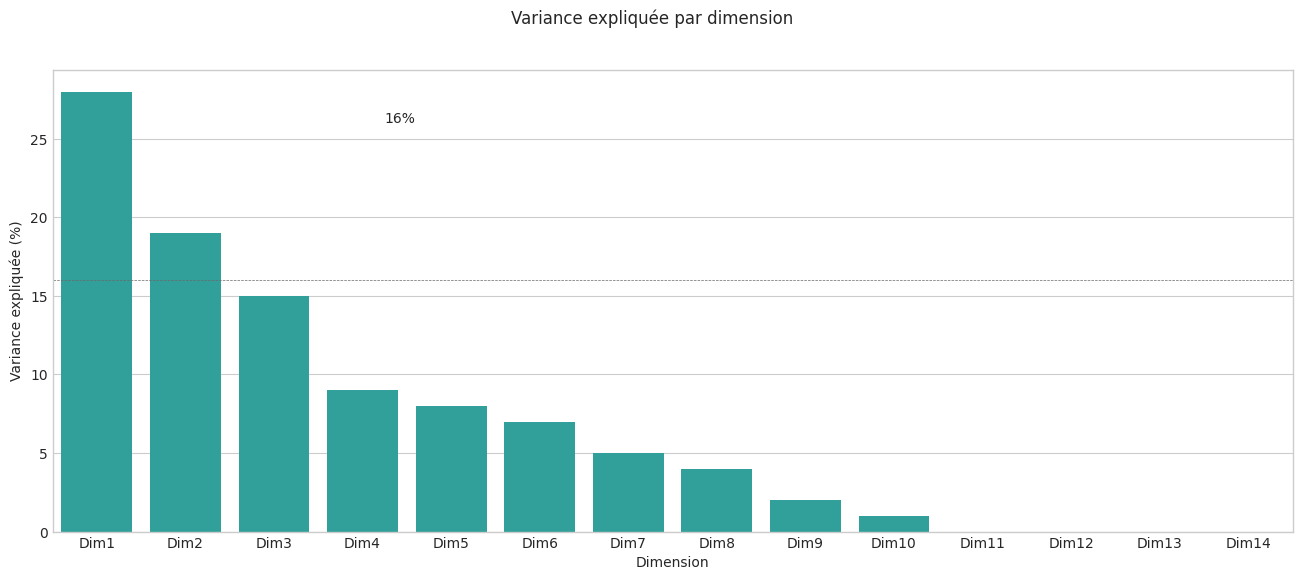

In [19]:
plt.figure(figsize=(16, 6))
g_eig = sns.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        palette = ["lightseagreen"],
                        data = eig)
plt.text(3.25, 26, "16%")
plt.axhline(y = 16, linewidth = .5, color = "dimgray", linestyle = "--") # 16 = 100 / 6 (nb dimensions)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

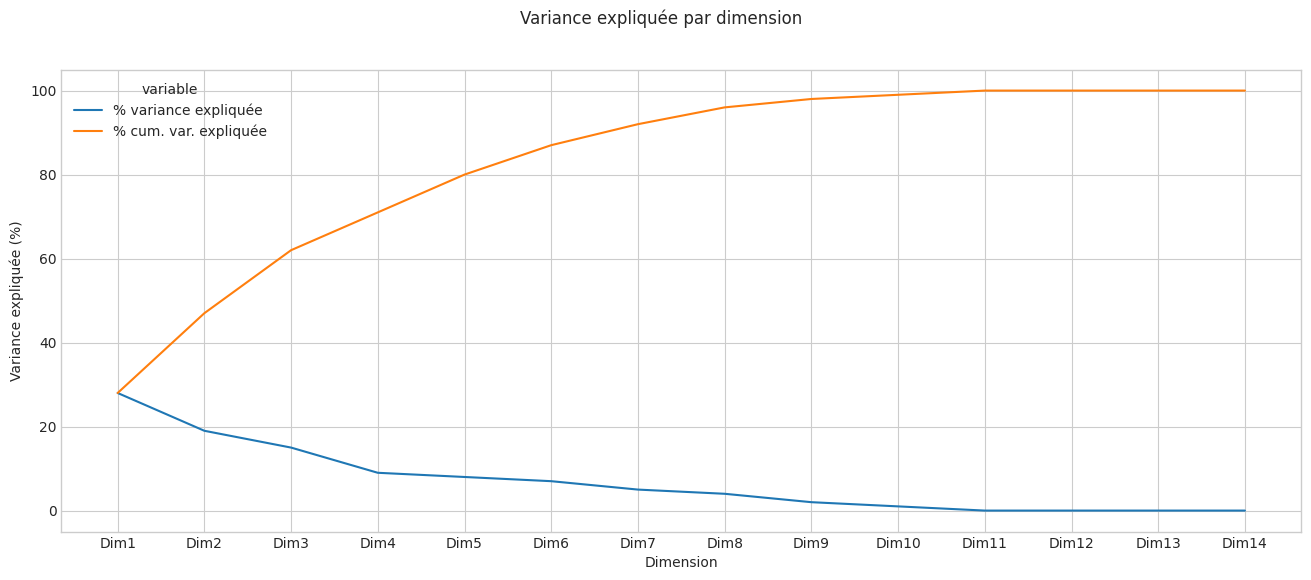

In [20]:
plt.figure(figsize=(16, 6))

eig2 = eig.filter(["Dimension", "% variance expliquée", "% cum. var. expliquée"]).melt(id_vars = "Dimension")
g_eig2 = sns.lineplot(x = "Dimension", 
                 y = "value",
                 hue = "variable",
                 data = eig2)

g_eig2.set(ylabel = "Variance expliquée (%)")
g_eig2.figure.suptitle("Variance expliquée par dimension")

plt.show()

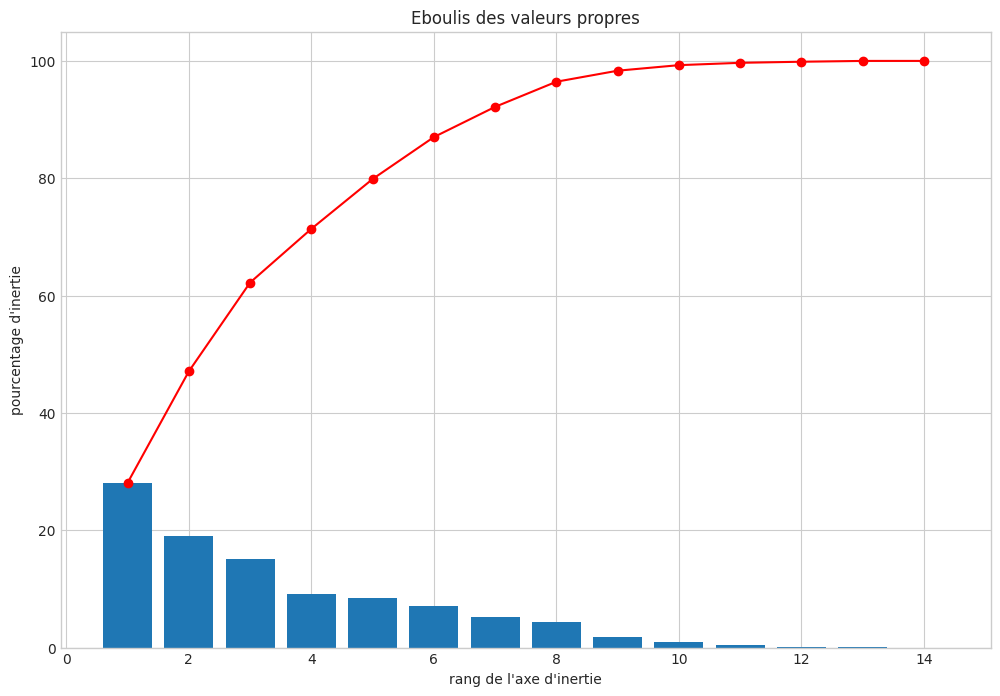

In [21]:
# Eboulis des valeurs propres
varexpl = valprop_ratio*100
fig = plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On remarque ici que les 4 premiers axes cumulent 80% de l'inertie totale. 

## Cercle des corrélations

Nous allons maintenant calculer les coordonnées des iris de Fisher sur les dimensions, avec la fonction transform() de l'objet pca.

Afin de manipuler plus facilement l'objet obtenu, nous allons créer un DataFrame pandas en ne prenant que les quatres premières dimensions, ainsi que la nature Vrai/Faux du billet (is_genuine)

In [24]:
iris_pca = acp.transform(acp_dataset[acp_dataset.columns[:14]])
iris_pca_df = pd.DataFrame({
    "Dim1" : iris_pca[:,0], 
    "Dim2" : iris_pca[:,1],
    "Dim2" : iris_pca[:,2], 
    "Dim2" : iris_pca[:,3] 
})
iris_pca_df.head()

,Dim1,Dim2
0,5621.158004,10922.882593
1,15662.018846,41858.696015
2,4010.023269,8843.476042
3,10968.761114,30514.760971
4,7795.794586,17959.651571


In [31]:
coordvar = acp.components_.T * numpy.sqrt(valprop)
coordvar_df = pd.DataFrame(coordvar, columns=['PC'+str(i) for i in range(1, 15)], index=acp_dataset.columns[0:15])
coordvar_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
longitude,0.203167,-0.676063,-0.588936,0.093168,0.031516,0.015414,-0.356049,-0.077928,-0.011440,-0.020988,0.010352,0.102909,0.029216,-8.069383e-32
latitude,-0.204804,0.828464,0.363552,-0.111995,-0.158247,-0.003111,0.270580,0.124784,0.003056,-0.017759,0.009696,0.109452,0.028566,-1.434317e-31
housing_median_age,-0.433035,-0.125397,0.263143,-0.174528,0.572904,0.002393,-0.250764,0.547185,0.077429,-0.024347,-0.001496,0.002108,-0.000162,-4.776587e-33
total_rooms,0.948352,0.137703,0.129358,0.030341,-0.045158,0.011844,-0.064375,0.074143,0.041466,-0.136251,0.176777,-0.020162,0.017631,-6.146461e-32
total_bedrooms,0.956989,0.154310,0.045647,-0.026170,0.128045,0.003807,-0.011064,0.039193,-0.089948,-0.125511,-0.078264,0.032552,-0.092498,1.939680e-32
population,0.924534,0.112390,-0.007955,-0.074746,0.137446,-0.007665,0.010445,0.051302,0.139961,0.290639,0.025371,0.016855,-0.018329,3.589035e-32
households,0.962375,0.137898,0.072576,-0.038666,0.138874,-0.003915,0.002572,0.045531,-0.051329,-0.030985,-0.117524,-0.028089,0.092413,4.987651e-33
median_income,0.121803,-0.358783,0.577066,0.199926,-0.591685,0.024337,-0.175662,0.087127,0.300025,-0.035296,-0.055614,0.003471,-0.005223,-6.298005e-32
median_house_value,0.101059,-0.472344,0.718709,0.173042,-0.235853,0.040227,-0.097657,0.136164,-0.354918,0.091584,0.022749,0.007477,0.001331,-6.338749e-33
location_<1H OCEAN,0.130283,-0.727815,0.036626,-0.576315,-0.060247,-0.030067,0.336226,0.035221,0.021198,-0.023268,0.005603,0.006683,0.001687,-1.763432e-16


Une fois ces coordonnées récupérées, on peut donc afficher ce cercle des corrélations comme ci-dessous.

In [32]:

def correlation_circle(arg1,arg2):
    #cercle des corrélations 
    fig, axes = plt.subplots(figsize=(12,12)) 

    #détermination des limites du graphique
    axes.set_xlim(-1,1) 
    axes.set_ylim(-1,1) 

    #ajouter les axes 
    plt.plot([-1,1],[0,0],linewidth=1, color='grey', ls='--') 
    plt.plot([0,0],[-1,1],linewidth=1, color='grey', ls='--')

    fig.suptitle("Cercle des corrélations (F1 et F2)")

    for j in range(6):
        axes.text(coordvar_df[arg1][j],coordvar_df[arg2][j], coordvar_df.index[j], size = 16)
        axes.plot([0,coordvar_df[arg1][j]], [0,coordvar_df[arg2][j]], color = "gray", linestyle = 'dashed')
    
    #ajouter un cercle 
    cercle = plt.Circle((0,0),1,color='#17aafa',fill=False) 
    axes.add_artist(cercle) 

    # nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F1 ({}%)'.format(round(100*valprop_ratio[0],2)))
    plt.ylabel('F2 ({}%)'.format(round(100*valprop_ratio[1],2)))

    return plt.show()


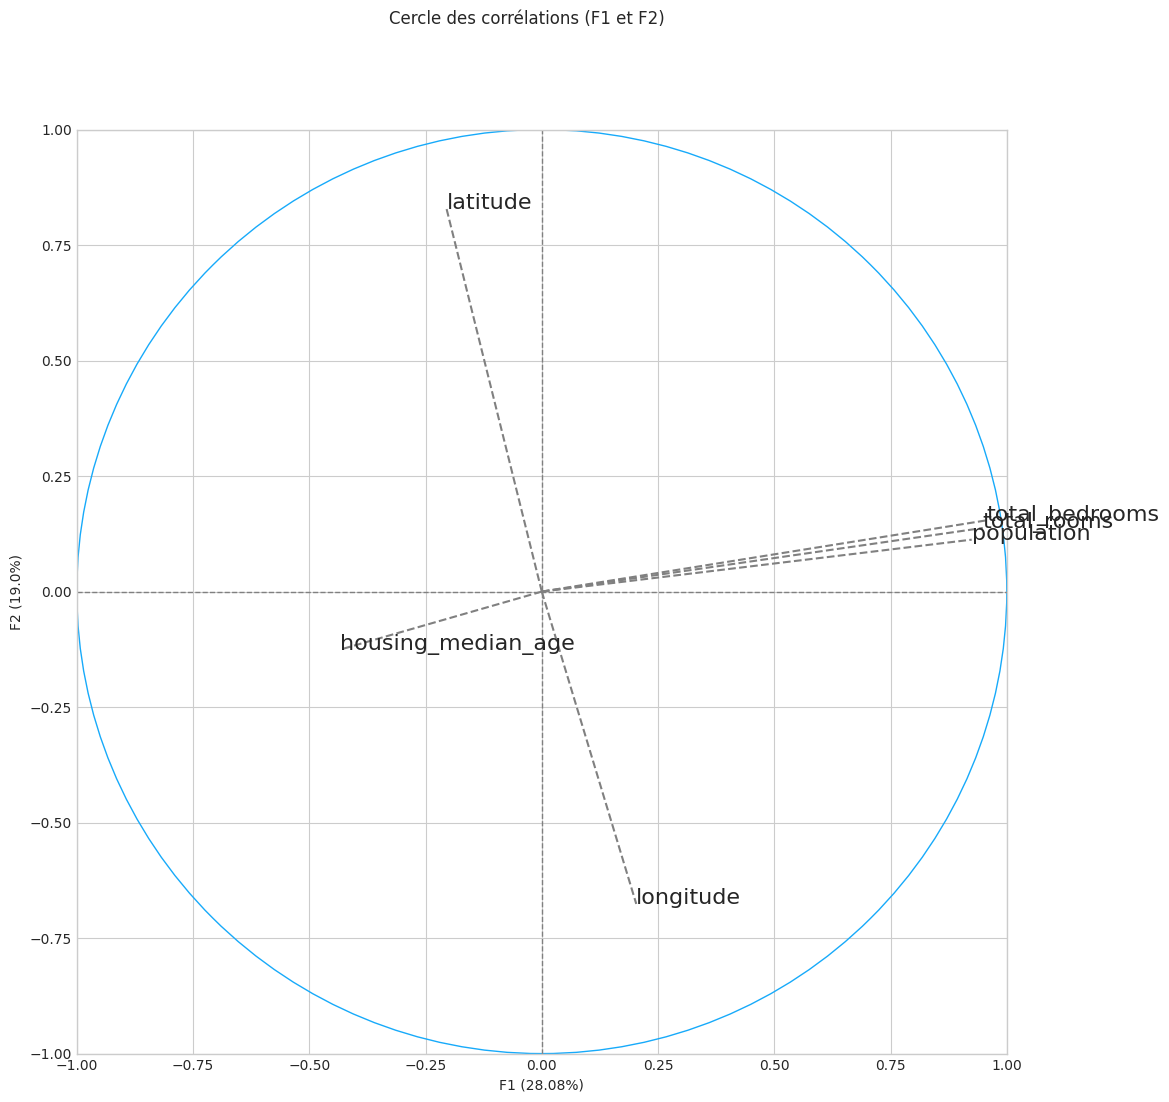

In [33]:
correlation_circle("PC1","PC2")

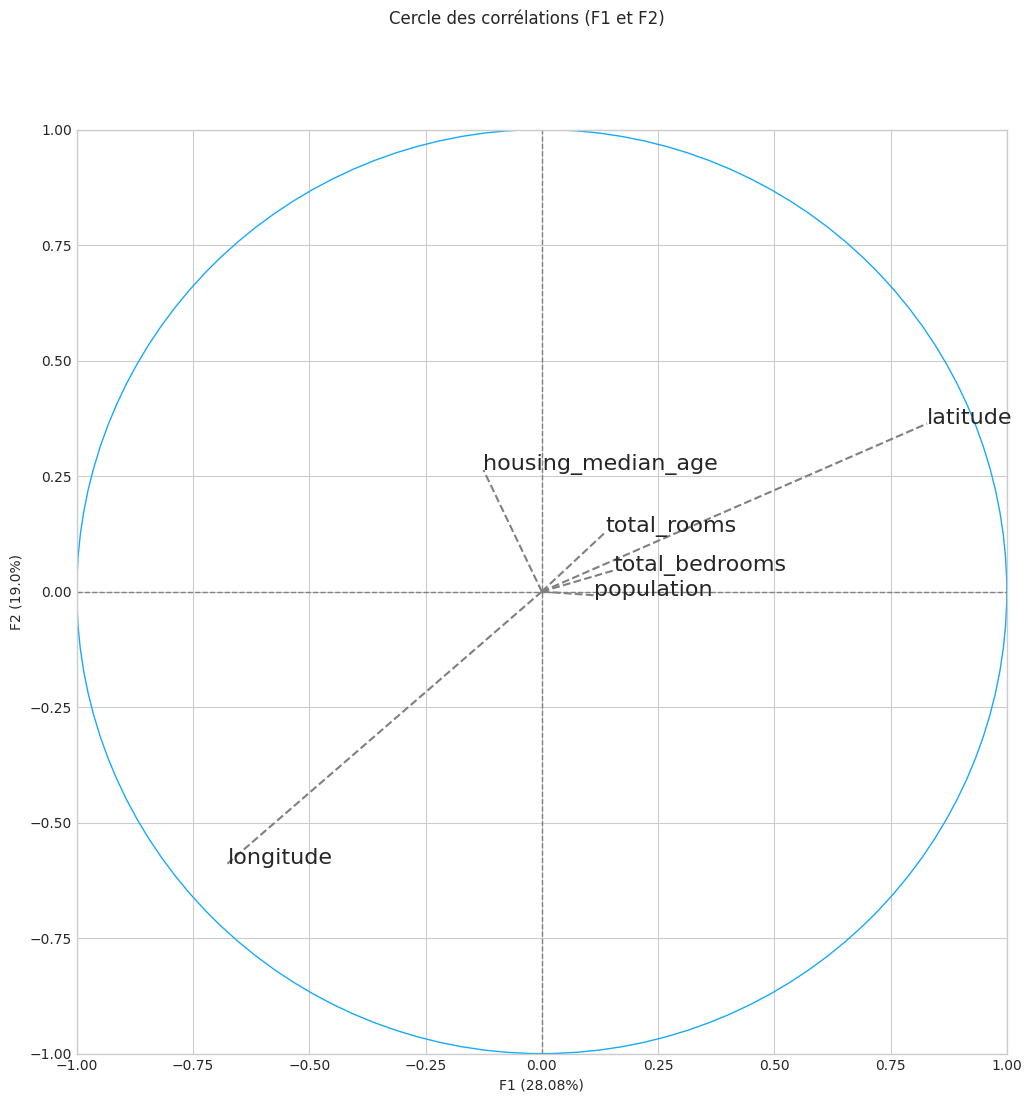

In [34]:
correlation_circle("PC2","PC3")

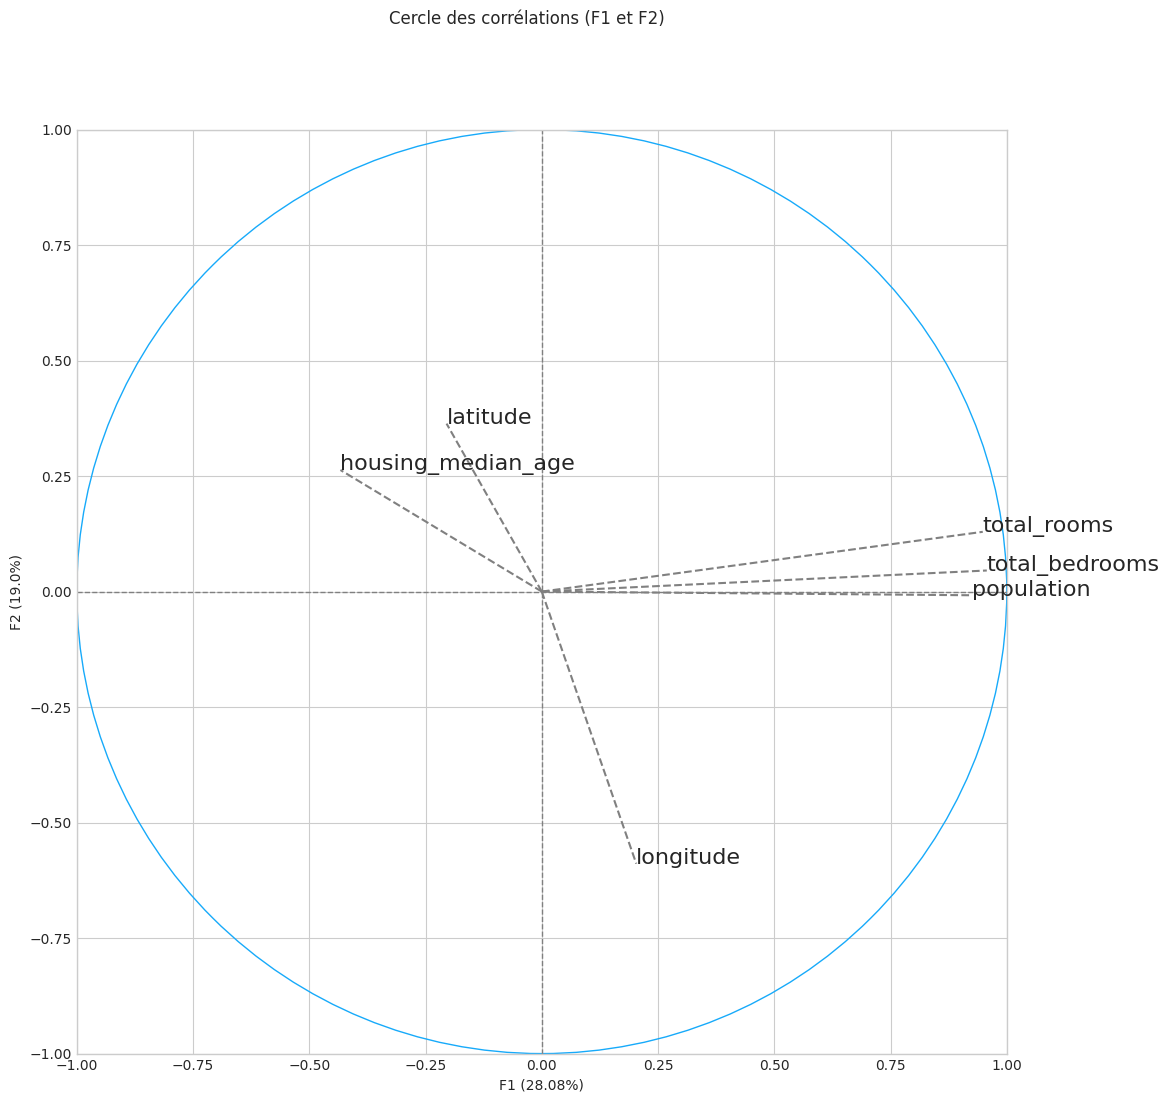

In [35]:
correlation_circle("PC1","PC3")

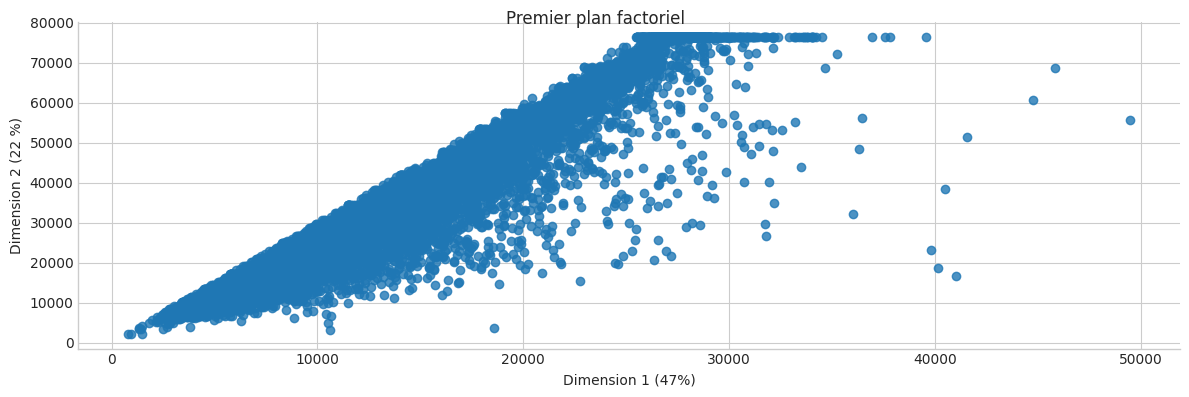

In [40]:
g_pca = sns.lmplot(x = "Dim1", y = "Dim2", data = iris_pca_df, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca.set(xlabel = "Dimension 1 (47%)", ylabel = "Dimension 2 (22 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()